# Scikit-learn Examples

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

## Training and Running a Linear Model

### Data set

Determine if money makes people happy. Consider the Better Life Index data from the OECD's website and the IMF's GDP (gross domestic product) per capita.

The `prepare_country_stats()` function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. 

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the datasets
oecd_bli = pd.read_csv("./data/lifesat/oecd_bli_2015.csv", thousands=',')

gdp_per_capita = pd.read_csv("./data/lifesat/gdp_per_capita.csv",
                             thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [6]:
oecd_bli.head()

LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   
3     units                    NaN               NaN    0.2        NaN   
4     units                    NaN               NaN    0.9        NaN   

             Flags  
0  Estimated value  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [7]:
gdp_per_capita.head()

Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0  
1   3995.383                 2010.0  
2   4318.135                 2014.0  
3   4100.315                 2014.0  
4  14414.302                 2011.0

In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head()

GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1

In [9]:
# Build X and y
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

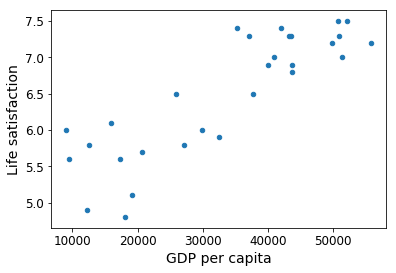

In [10]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

The data is noisy. It looks like `life satisfaction` goes up more or less linearly as the `country's GDP per capita` increases. 

### Linear Model 

Try to model life satisfaction as a linear function of GDP per capita. 

Let's try to train and run a `linear model` using scikit-learn. 

* Particularly train the model to finds the parameters that make the linear model fit best to your data.
* Then determine how the model fits the training data.
* Finally make predictions.

In [11]:
import sklearn.linear_model

In [12]:
# Select a linear regression model
model = sklearn.linear_model.LinearRegression()

In [13]:
# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [15]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

## Training and Running a Neighbors Model

### K-Nearest neighbors Model 

Consider the two next-closest countries to detect life satisfaction. 

Let's try to train and run a `k-Nearest neighbors` using scikit-learn. 

In [16]:
import sklearn.neighbors

# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3) 
# to detect two closest countries

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.7666667]]

[[5.76666667]]
